In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

### Исследование данных

In [2]:
data = pd.read_csv('train2.csv')

data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Находим и заменяем некорректные значения общей площади значениями похожих по параметрам квартир

In [5]:
data.loc[data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [6]:
data.loc[data['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [7]:
data.loc[(data['HouseYear'] == 1977) & (data['Rooms']==2)]['Square'].median()

63.64087851982289

In [8]:
data.loc[4262, 'Square'] = 63.85
data.loc[4328, 'Square'] = 74.80
data.loc[4328, 'LifeSquare'] = 74.80
data.loc[6977, 'Square'] = 63.81
data.loc[6977, 'LifeSquare'] = 63.81

In [9]:
data.loc[6977, 'Square'] = data.loc[(data['HouseYear'] ==2019) & (data['Rooms']==2) & (data['Price'] > 100000) & \
                                    (data['Price'] < 150000)]['Square'].median()

In [10]:
data.loc[4690, 'Square'] = data.loc[(data['HouseYear'] ==2016) & (data['Rooms']==1) & (data['Price'] > 80000) & \
                                    (data['Price'] < 100000)]['Square'].median()

In [11]:
data.loc[8437, 'Square'] = data.loc[(data['HouseYear'] ==1998) & (data['Rooms']==3) & (data['Price'] > 350000) & \
                                    (data['Price'] < 400000)]['Square'].median()

In [12]:
data.loc[8437, 'LifeSquare'] = data.loc[(data['HouseYear'] ==1998) & (data['Rooms']==3) & (data['Price'] > 350000) & \
                                    (data['Price'] < 400000)]['Square'].median()

In [13]:
data.loc[4690, 'Square'] = data.loc[(data['HouseYear'] ==2016) & (data['Rooms']==1) & (data['Price'] > 80000) & \
                                    (data['Price'] < 100000)]['Square'].median()

In [14]:

data.loc[4690, 'LifeSquare'] = data.loc[(data['HouseYear'] ==2016) & (data['Rooms']==1) & (data['Price'] > 80000) & \
                                    (data['Price'] < 100000)]['Square'].median()

In [15]:
data.loc[data['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


In [16]:
mean_square_rooms_year = data.loc[(data['Rooms'] == 1) & (data['HouseYear'] == 1977) & (data['Square']>15)]['Square'].median()
mean_square_rooms_year

42.6249562279706

In [17]:
def mean_square_rooms_year(Rooms, HouseYear, data=data):
    mean_square_rooms_year = data.loc[(data['Rooms'] == Rooms) & (data['HouseYear'] == HouseYear) & (data['Square']>15)]['Square'].median()
    return mean_square_rooms_year

In [18]:
def clean_small_square(data):
    for i in data.index:
        if data.loc[i, 'Square']<15:
            Rooms = data.loc[i, 'Rooms']
            HouseYear = data.loc[i,'HouseYear']
            data.loc[i,'Square'] = mean_square_rooms_year(Rooms, HouseYear)
        if data.loc[i, 'Square'] < data.loc[i, 'LifeSquare']:
            data.loc[i, 'Square'] = data.loc[i, 'LifeSquare']
            

In [19]:
clean_small_square(data)

In [20]:
data.loc[data['Square']< data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Заменяем кол-во комнат от 6 или равные 0 значениями похожих по параметрам квартир

In [21]:
data['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [22]:
data.loc[data['Rooms']<1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,81.491446,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [23]:
data.loc[(data['Rooms']>=1) & (data['Rooms']<=5) & (data['HouseYear'] == 1994)].groupby(['Rooms'])['Square'].median()

Rooms
1.0    40.829382
2.0    56.059744
3.0    75.179726
4.0    92.622516
Name: Square, dtype: float64

In [24]:
data.loc[data['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [25]:
data.loc[2269, ['Rooms']] = 1
data.loc[4366, ['Rooms']] = 3
data.loc[4853, ['Rooms']] = 3
data.loc[8834, ['Rooms']] = 3
data.loc[3911, ['Rooms']] = 1
data.loc[6149, ['Rooms']] = 1
data.loc[1397, ['Rooms']] = 4
data.loc[1981, ['Rooms']] = 5
data.loc[377, ['Rooms']] = 2
data.loc[1454, ['Rooms']] = 1
data.loc[2170, ['Rooms']] = 3
data.loc[8849, ['Rooms']] = 2


Заменяем некорретные значения этажности дома

In [26]:
def floor_to_housefloor(data):
    data.loc[data['HouseFloor'] < data['Floor'],['HouseFloor']] = data['Floor']
    data.loc[data['HouseFloor'] > 50, 'HouseFloor'] = data['Floor']
    

In [27]:
floor_to_housefloor(data)

In [28]:
data.loc[data['HouseFloor']>30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
339,11563,8,1.0,50.390862,41.642898,0.0,32,32.0,2008,0.092291,B,B,21,4346,2,165.0,1,2,B,97480.845791
359,15722,31,2.0,82.435495,48.655394,16.0,23,40.0,2013,0.151346,B,A,32,5889,10,830.0,4,1,B,558262.139114
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,B,B,43,10621,1,30.0,2,3,B,213171.135199
1956,15157,54,1.0,106.239622,83.296167,17.0,26,37.0,2009,0.006076,B,B,30,5285,0,645.0,6,6,B,274139.065875
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1786.0,1,5,B,411691.504766
3330,3298,31,1.0,57.551691,21.551876,10.0,32,40.0,1977,0.151346,B,A,32,5889,10,830.0,4,1,B,393799.531732
3662,1102,54,3.0,101.279843,52.188698,20.0,20,37.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,124844.932865
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,B,B,37,7687,11,176.0,5,5,B,450706.552655
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,B,B,22,6398,141,1046.0,3,23,B,117647.461002


In [29]:
data['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [30]:
data.loc[(data['HouseYear'] == 4968) | (data['HouseYear'] == 20052011)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [31]:
data.loc[1497, 'HouseYear'] = 2011
data.loc[4189, 'HouseYear'] = 1968

#### train_test_split

In [32]:
train, valid = train_test_split(data, test_size = 0.3, random_state = 42)

Разделим на 3 фолда:

In [33]:
train_, train_3 = train_test_split(train, test_size = 0.333, random_state = 42)

In [34]:
train_.shape

(4669, 20)

In [35]:
train_.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3845,16665,110,3.0,85.282489,49.033513,10.0,16,18.0,1996,0.033494,B,B,66,10573,1,1322.0,3,8,B,314334.919408
8067,12413,1,3.0,62.734894,41.183185,8.0,8,14.0,1992,0.025609,B,B,33,5261,0,240.0,3,1,B,233803.210426
1648,14273,90,2.0,51.636069,32.475733,8.0,5,17.0,1988,0.246032,B,A,22,3151,4,2715.0,3,3,B,258636.098930
6274,4708,9,2.0,55.736223,28.836031,9.0,15,15.0,2008,0.161532,B,B,25,5648,1,30.0,2,4,B,195960.295345
6812,1886,43,2.0,47.023881,28.909219,5.0,4,5.0,1964,0.000078,B,B,22,6398,141,1046.0,3,23,B,228669.941101


In [36]:
train_3.shape

(2331, 20)

In [37]:
train_3.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7186,11483,1,1.0,48.133815,NaN,1.0,7,20.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,180099.659745
8742,9960,26,2.0,80.246187,41.548877,14.0,20,30.0,2011,0.000000,B,B,36,6714,2,2672.0,0,2,B,451810.061279
71,2136,74,2.0,84.687732,81.905552,0.0,12,17.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,243479.876105
7209,6959,59,2.0,55.878215,33.329269,8.0,17,17.0,1985,0.019509,B,B,37,7687,11,176.0,5,5,B,344183.239861
5774,8631,109,2.0,43.124938,29.556886,5.0,2,5.0,1962,0.136330,B,B,30,6141,10,262.0,3,6,B,145128.300586


In [38]:
train_1, train_2 = train_test_split(train_, test_size = 0.5, random_state = 42)

In [39]:
train_1.shape

(2334, 20)

In [40]:

train_1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9210,4873,27,1.0,46.757574,46.757574,10.0,5,17.0,2014,0.011654,B,B,4,915,0,NaN,0,0,B,128863.124150
422,4294,183,1.0,37.774297,19.477766,6.0,8,13.0,1971,0.037316,B,B,32,6748,93,562.0,4,10,B,360914.098453
1331,4059,1,2.0,53.371919,NaN,1.0,8,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,186016.214878
7482,13264,130,3.0,85.616137,51.264307,11.0,5,6.0,1954,0.218440,B,B,21,4472,6,1450.0,4,7,A,402332.491549
2937,16793,53,1.0,33.258974,19.576423,6.0,6,12.0,1972,0.313925,B,B,22,4625,11,3855.0,2,10,B,201307.933649


In [41]:
train_2.shape

(2335, 20)

In [42]:
train_2.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2502,5847,67,3.0,76.040467,46.791640,10.0,10,16.0,1977,0.100456,B,B,43,7227,0,NaN,1,6,A,320744.631742
508,12231,23,1.0,43.371576,NaN,1.0,18,18.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,109463.907995
2173,7530,33,1.0,42.161574,21.032162,9.0,4,14.0,1973,0.051942,B,B,17,4017,7,800.0,2,0,B,218458.432907
8541,16678,85,2.0,56.342103,34.636839,9.0,13,16.0,1976,0.037178,B,B,52,11217,1,2300.0,1,7,B,259343.353816
2958,6347,105,2.0,44.621359,27.985707,5.0,8,9.0,1973,0.040243,B,B,25,3478,11,2729.0,3,1,B,211455.724395


#### Добавляем столбцы с информацией о средней стоимости метра в данном районе

In [43]:
mean_price_for_district = train.groupby(['DistrictId', 'Rooms'], as_index = False)['Price'].mean() \
.rename(columns = {'Price':'Mean_price_for_district'})
mean_price_for_district.head()



,DistrictId,Rooms,Mean_price_for_district
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [44]:
total_train_mean_price = train['Price'].mean()
total_train_mean_price

214449.1673897029

In [45]:
for_train_3 = pd.concat([train_1, train_2], axis = 0)


In [46]:
for_train_2 = pd.concat([train_1, train_3], axis = 0)


In [47]:
for_train_1 = pd.concat([train_3, train_2], axis = 0)

In [48]:
mean_price_for_district_train_3 = for_train_3.groupby(['DistrictId', 'Rooms'], as_index = False)['Price'].mean() \
.rename(columns = {'Price':'Mean_price_for_district'})
mean_price_for_district.head()

,DistrictId,Rooms,Mean_price_for_district
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [49]:
total_train_mean_price_train_3 = for_train_3['Price'].mean()
total_train_mean_price_train_3 

214916.14480509787

In [50]:
mean_price_for_district_train_2 = for_train_2.groupby(['DistrictId', 'Rooms'], as_index = False)['Price'].mean() \
.rename(columns = {'Price':'Mean_price_for_district'})
mean_price_for_district.head()

,DistrictId,Rooms,Mean_price_for_district
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [51]:
total_train_mean_price_train_2 = for_train_2['Price'].mean()
total_train_mean_price_train_2

212971.68751038433

In [52]:
mean_price_for_district_train_1 = for_train_1.groupby(['DistrictId', 'Rooms'], as_index = False)['Price'].mean() \
.rename(columns = {'Price':'Mean_price_for_district'})
mean_price_for_district.head()

,DistrictId,Rooms,Mean_price_for_district
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [53]:
total_train_mean_price_train_1 = for_train_1['Price'].mean()
total_train_mean_price_train_1

215459.05296289953

In [54]:
def add_mean_price(df, mean_price, total_train_mean_price):
    
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how = 'left')
    df['Mean_price_for_district'] = df['Mean_price_for_district'].fillna(total_train_mean_price)
    return df

In [55]:
train_1 = add_mean_price(train_1, mean_price_for_district_train_1, total_train_mean_price_train_1)
train_1.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_price_for_district
0,4873,27,1.0,46.757574,46.757574,10.0,5,17.0,2014,0.011654,B,B,4,915,0,NaN,0,0,B,128863.124150,124311.573288
1,4294,183,1.0,37.774297,19.477766,6.0,8,13.0,1971,0.037316,B,B,32,6748,93,562.0,4,10,B,360914.098453,309354.720698
2,4059,1,2.0,53.371919,NaN,1.0,8,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,186016.214878,198089.545555
3,13264,130,3.0,85.616137,51.264307,11.0,5,6.0,1954,0.218440,B,B,21,4472,6,1450.0,4,7,A,402332.491549,242184.811475
4,16793,53,1.0,33.258974,19.576423,6.0,6,12.0,1972,0.313925,B,B,22,4625,11,3855.0,2,10,B,201307.933649,191341.370432


In [56]:
train_2 = add_mean_price(train_2, mean_price_for_district_train_2, total_train_mean_price_train_2)
train_2.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_price_for_district
0,5847,67,3.0,76.040467,46.791640,10.0,10,16.0,1977,0.100456,B,B,43,7227,0,NaN,1,6,A,320744.631742,267146.031656
1,12231,23,1.0,43.371576,NaN,1.0,18,18.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,109463.907995,102100.565529
2,7530,33,1.0,42.161574,21.032162,9.0,4,14.0,1973,0.051942,B,B,17,4017,7,800.0,2,0,B,218458.432907,156332.706835
3,16678,85,2.0,56.342103,34.636839,9.0,13,16.0,1976,0.037178,B,B,52,11217,1,2300.0,1,7,B,259343.353816,249628.267024
4,6347,105,2.0,44.621359,27.985707,5.0,8,9.0,1973,0.040243,B,B,25,3478,11,2729.0,3,1,B,211455.724395,216751.937508


In [57]:
train_3 = add_mean_price(train_3, mean_price_for_district_train_3, total_train_mean_price_train_3)
train_3.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_price_for_district
0,11483,1,1.0,48.133815,NaN,1.0,7,20.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,180099.659745,146442.322636
1,9960,26,2.0,80.246187,41.548877,14.0,20,30.0,2011,0.000000,B,B,36,6714,2,2672.0,0,2,B,451810.061279,238534.166185
2,2136,74,2.0,84.687732,81.905552,0.0,12,17.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,243479.876105,236850.164662
3,6959,59,2.0,55.878215,33.329269,8.0,17,17.0,1985,0.019509,B,B,37,7687,11,176.0,5,5,B,344183.239861,304756.628628
4,8631,109,2.0,43.124938,29.556886,5.0,2,5.0,1962,0.136330,B,B,30,6141,10,262.0,3,6,B,145128.300586,305782.147598


In [58]:
train = pd.concat([train_1, train_2, train_3], axis = 0)

In [59]:
train.shape

(7000, 21)

In [60]:
valid = add_mean_price(valid, mean_price_for_district, total_train_mean_price)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_price_for_district
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,B,B,25,5487,3,NaN,0,4,B,181530.459031,189591.187596
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,B,16,4048,3,NaN,1,3,B,260456.004692,293153.148921
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640,212697.728448
3,15611,23,1.0,33.863324,29.993297,0.0,5,5.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,66883.280318,102427.030975
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,114086.065201,135270.547115


In [61]:
valid.shape

(3000, 21)

In [62]:
feats = ['Rooms', 'Square', 'HouseFloor','Floor', 'HouseYear', 'Mean_price_for_district', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1']

#### Random Forest

In [63]:
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor as RFR

In [64]:
def evaluate_model(model, max_depth, metrics, target, train, valid, feats, random_state=42):

    dtr = model(max_depth = max_depth)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metrics_train = metrics(train[target], y_pred_train)
    metrics_valid = metrics(valid[target], y_pred_valid)
    #print('max_depth: {} train: {}, \nvalid: {}'.format(max_depth, metrics_train, metrics_valid))
    return metrics_train, metrics_valid

In [65]:
max_depth_arr = []
metrics_train_arr = []
metrics_valid_arr = []

for i in range(1, 15):
    rez = evaluate_model(model=RFR, max_depth=i, metrics=r2, target='Price', train=train, valid=valid, feats=feats)  
    max_depth_arr.append(i)
    metrics_train_arr.append(rez[0])
    metrics_valid_arr.append(rez[1]) 


In [66]:
def check_param(min_value, max_value, model, max_depth=i, metrics=r2, target='Price', train=train, valid=valid, feats=feats):
    
    max_depth_arr = []
    metrics_train_arr = []
    metrics_valid_arr = []

    for i in range(min_value, max_value):
        rez = evaluate_model(model, max_depth=i, metrics=r2, target='Price', train=train, valid=valid, feats=feats)  
        max_depth_arr.append(i)
        metrics_train_arr.append(rez[0])
        metrics_valid_arr.append(rez[1])
    return max_depth, metrics_train_arr, metrics_valid_arr

In [67]:
max_depht, metrics_train_arr, metrics_valid_arr =check_param(min_value=1, max_value=15, model = RFR)

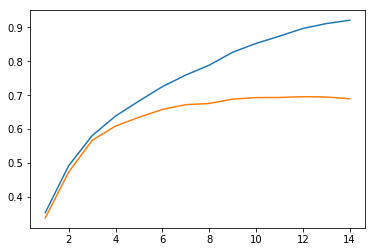

In [68]:
plt.plot(max_depth_arr, metrics_train_arr)
plt.plot(max_depth_arr, metrics_valid_arr)


In [69]:
max_depht, metrics_train_arr, metrics_valid_arr = check_param(min_value=11, max_value = 13, model = RFR)
print(metrics_train_arr, metrics_valid_arr)

[0.8768135904920971, 0.8946816412862123] [0.6901365275443936, 0.6950067499160975]


In [70]:
model = RFR(max_depth = 12, random_state = 42)

In [71]:
model.fit(train.loc[:,feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Test

In [72]:
test= pd.read_csv('test.csv')

In [73]:
test = add_mean_price(test, mean_price_for_district, total_train_mean_price)

In [74]:
test['Price'] = model.predict(test.loc[:,feats])

In [75]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Mean_price_for_district,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,170278.368262,169859.749087
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,240692.688382,251816.273620
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,214449.167390,228257.582817
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,198197.383850,296561.574346
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,123456.596103,144274.715150


In [76]:
test.loc[:, ['Id', 'Price']].to_csv('NMaslenicyna_predictions.csv', index = None)